In [1]:
#Mount the google drive 
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
#!Copy the great stone fund rating datasets from google drive to google colab local.
!cp /content/gdrive/My\ Drive/Hackathon/* .

In [3]:
#Run ipython runtime to find the run time of each cell
!pip install ipython-autotime
%load_ext autotime

  Created wheel for ipython-autotime: filename=ipython_autotime-0.1-cp36-none-any.whl size=1832 sha256=97774250854f73297daf74b35b7deb9202d6fae2057c3134157a2af52f552df5
  Stored in directory: /root/.cache/pip/wheels/d2/df/81/2db1e54bc91002cec40334629bc39cfa86dff540b304ebcd6e
Successfully built ipython-autotime


In [4]:
#Import the required library
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

time: 285 ms


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Load all the provided input files
br = pd.read_csv('bond_ratings.csv')
fa = pd.read_csv('fund_allocations.csv')
fc = pd.read_csv('fund_config.csv')
fr = pd.read_csv('fund_ratios.csv')
fs = pd.read_csv('fund_specs.csv')
os = pd.read_csv('other_specs.csv')
r3 = pd.read_csv('return_3year.csv')
r5 = pd.read_csv('return_5year.csv')
r10 = pd.read_csv('return_10year.csv')

ss = pd.read_csv('sample_submission.csv')

time: 478 ms


In [6]:
#Combining the dataframes to form a single dataframe
fa.rename(columns={'id':'tag'},inplace=True)

df = pd.merge(fc, fr, on='fund_id')
df = pd.merge(df, fs, on='tag')
df = pd.merge(df, fa, on='tag')
df = pd.merge(df, os, on='tag')
df = pd.merge(df, br, on='tag')
df = pd.merge(df, r3, on='tag')
df = pd.merge(df, r5, on='tag')
df = pd.merge(df, r10, on='fund_id')

time: 243 ms


In [7]:
#Dropping the unwanted columns from the database
df.drop(['parent_company','fund_name','tag','currency','pc_ratio_y','pb_ratio_y','pe_ratio_y','mmc_y','ps_ratio_y'],axis=1,inplace = True)
df.drop(['greatstone_rating_y','us_govt_bond_rating'],axis=1,inplace = True)

time: 60.6 ms


In [8]:
train_df = df

time: 1.35 ms


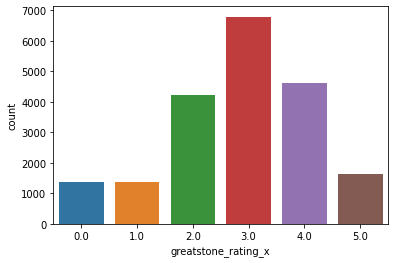

time: 200 ms


In [9]:
#Count plot to find the distribution of the ratings
sns.countplot(train_df['greatstone_rating_x'])

In [10]:
#Print the top 3 columns of the dataframe
train_df.head(3)

,category,fund_id,fund_ratio_net_annual_expense,pb_ratio_x,ps_ratio_x,mmc_x,pc_ratio_x,pe_ratio_x,investment_class,total_assets,yield,greatstone_rating_x,inception_date,fund_size,return_ytd,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years_x,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years_y,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,Energy Limited Partnership,264614c6-5ac3-4146-ba26-1674b136cb40,1.44,1.71,1.31,"19,857.41",5.91,14.51,Value,1.185000e+07,5.57,NaN,2015-02-02,Large,20.19,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,20.19,2.0,NaN,4.20,NaN,20.19,19.10,-5.78,18.40,NaN,0.0,19.10,0.00,16.14,98.81,27.30,NaN,NaN,4.24,NaN,-12.23,-3.31,1.75,-34.98,4.12,0.00,0.00,NaN,NaN,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,Large Growth,f5ad58c2-fdea-4087-8678-e04744f89f90,0.58,5.30,3.38,"72,347.03",15.95,18.88,Growth,1.397000e+10,0.42,3.0,2012-05-30,Large,16.79,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,0.39,17.38,10.0,15.34,5.0,-2.09,10.71,0.10,NaN,16.79,1.0,14.25,2.12,35.46,16.79,15.67,27.67,12.18,5.60,0.0,15.67,0.00,1.64,99.90,3.23,NaN,NaN,14.39,NaN,-2.62,26.39,1.06,3.60,2.33,0.00,0.00,NaN,33.92,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,Large Growth,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.99,5.40,3.67,"68,857.43",15.97,23.27,Growth,2.660000

time: 163 ms


In [11]:
#Find the missing values
train_df.isna().sum()

category                                      0
fund_id                                       0
fund_ratio_net_annual_expense                 0
pb_ratio_x                                  114
ps_ratio_x                                  114
mmc_x                                       114
pc_ratio_x                                  114
pe_ratio_x                                  114
investment_class                           1480
total_assets                                119
yield                                       127
greatstone_rating_x                        5000
inception_date                                0
fund_size                                  1480
return_ytd                                  108
portfolio_communication_allocation          114
portfolio_financial_services                114
portfolio_industrials_allocation            114
portfolio_tech_allocation                   114
portfolio_materials_basic_allocation        114
portfolio_energy_allocation             

time: 30 ms


In [12]:
train_df.describe()

,fund_ratio_net_annual_expense,pb_ratio_x,total_assets,yield,greatstone_rating_x,return_ytd,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years_x,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,bb_rating,below_b_rating,others_rating,maturity_bond,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,duration_bond,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years_y,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
count,25000.000000,24886.000000,2.488100e+04,24873.000000,20000.000000,24892.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,18817.000000,15876.000000,23188.000000,24191.000000,24885.000000,24886.000000,14467.000000,24885.000000,23359.000000,17794.000000,24885.000000,16462.000000,24885.000000,24885.000000,23572.000000,24885.000000,19312.000000,24886.000000,24885.000000,24886.000000,21069.000000,24886.000000,21903.000000,13837.000000,12738.000000,24885.000000,15015.000000,24060.000000,22449.000000,25000.000000,20399.000000,24885.000000,24886.000000,24886.000000,13462.000000,17363.000000,24886.000000,24886.000000,24886.000000,8093.000000,24886.000000,24886.000000,24886.000000,24886.000000,24886.000000,9874.000000,23352.000000,24894.000000,23352.000000,24894.000000,23352.000000,23352.000000,23352.000000,23352.000000,24894.000000,24885.000000,24894.000000,24894.000000,24894.000000,24894.000000,24885.000000,24894.000000,21157.000000,21157.000000,21157.000000,21157.000000,24894.000000,21157.000000,21157.000000,24894.000000,24894.000000,24885.000000,24894.000000,24894.000000,24894.000000,24885.000000,24894.000000,16416.000000,16416.000000,16416.000000,16416.000000,24894.000000,16416.000000,24894.000000,24894.000000,24885.000000,24894.000000,24894.000000,24894.000000,16416.000000,24885.000000
mean,1.121677,1.854262,3.476451e+09,1.850446,2.839750,9.288884,2.272270,11.838126,9.055996,12.780061,3.898250,5.826646,5.111333,8.536916,4.926447,2.761792,9.211606,4.677046,12.411046,8.419312,-6.486223,2.736506,7.381846,-1.86

time: 426 ms


In [13]:
#Dropping the columns which has more NAN values
####   REVISIT AGAIN    ###
train_df.drop(['maturity_bond','duration_bond'],axis=1,inplace = True)


time: 14.4 ms


In [14]:
train_df.head(3)

,category,fund_id,fund_ratio_net_annual_expense,pb_ratio_x,ps_ratio_x,mmc_x,pc_ratio_x,pe_ratio_x,investment_class,total_assets,yield,greatstone_rating_x,inception_date,fund_size,return_ytd,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years_x,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,bb_rating,below_b_rating,others_rating,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years_y,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category
0,Energy Limited Partnership,264614c6-5ac3-4146-ba26-1674b136cb40,1.44,1.71,1.31,"19,857.41",5.91,14.51,Value,1.185000e+07,5.57,NaN,2015-02-02,Large,20.19,0.00,0.00,0.00,0.00,0.00,100.00,0.00,0.00,0.00,0.00,0.00,NaN,NaN,1.0,-16.32,13.05,1.19,NaN,20.19,2.0,NaN,4.20,NaN,20.19,19.10,-5.78,18.40,NaN,0.0,19.10,0.00,16.14,98.81,27.30,NaN,NaN,4.24,NaN,-12.23,-3.31,1.75,-34.98,4.12,0.00,0.00,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.46,-7.10,0.18,0.26,0.05,0.45,1.20,54.83,16.25,0.01,4.24,-0.04,0.01,0.00,0.42,7.36,0.51,NaN,NaN,NaN,NaN,-0.00,NaN,NaN,NaN,-0.00,-0.04,0.00,-0.11,0.01,0.20,-4.25,0.49,NaN,NaN,NaN,NaN,0.01,NaN,NaN,0.01,0.21,0.00,0.06,0.01,0.13,NaN,14.30
1,Large Growth,f5ad58c2-fdea-4087-8678-e04744f89f90,0.58,5.30,3.38,"72,347.03",15.95,18.88,Growth,1.397000e+10,0.42,3.0,2012-05-30,Large,16.79,0.78,9.77,9.97,35.51,2.86,0.38,5.88,14.41,2.67,0.39,17.38,10.0,15.34,5.0,-2.09,10.71,0.10,NaN,16.79,1.0,14.25,2.12,35.46,16.79,15.67,27.67,12.18,5.60,0.0,15.67,0.00,1.64,99.90,3.23,NaN,NaN,14.39,NaN,-2.62,26.39,1.06,3.60,2.33,0.00,0.00,NaN,33.92,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.2,0.07,0.13,1.06,0.13,1.19,1.07,88.46,12.26,0.01,14.39,0.01,0.01,0.01,0.84,15.35,0.86,0.89,0.34,90.11,12.40,0.01,1.05,10.37,0.99,0.01,0.10,11.71,-0.00,0.01,0.13,11.26,0.88,1.16,0.16,91.68,14.30,0.01,1.08,15.57,0.01,0.15,17.25,-0.01,0.01,0.14,1.42,15.94
2,Large Growth,3c13f4ab-02c4-4ca7-a133-7e996ec5d0c4,0.99,5.40,3.67,"68,857.43",15.97,23.27,Growth,2.660000e+09,0.02,4.0,1987-08-23,Large,17.13,4.70,16

time: 108 ms


In [15]:
train_df['inception_date'] = train_df['inception_date'].astype('datetime64[ns]')

time: 9.21 ms


In [16]:
train_df['inception_year'] = pd.DatetimeIndex(train_df['inception_date']).year

#Extracting passed years since the date
train_df['passed_years'] = date.today().year - train_df['inception_date'].dt.year

#Extracting passed months since the date
train_df['passed_months'] = (date.today().year - train_df['inception_date'].dt.year) * 12 + date.today().month - train_df['inception_date'].dt.month

time: 42.5 ms


In [17]:
## REVISIT AGAIN ##

train_df['years_up'][(train_df['years_up'].isna())] = 0
train_df['years_down'][(train_df['years_down'].isna())] = 0


time: 14.6 ms


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [18]:
#Missing value imputation based on the category of the mutual fund
cat_return = ['investment_class','fund_size']

for cat in cat_return:
  print(cat)
  for i, row in train_df.iterrows():
    if(not pd.notnull(row[cat])):
      category_name = row['category']
      fund_id = row['fund_id']
      if len(train_df[cat][(train_df['category'] == category_name)].value_counts()) != 0:
        train_df[cat][(train_df['fund_id'] == fund_id)] = train_df[cat][(train_df['category'] == category_name)].value_counts().idxmax()



investment_class


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


fund_size
time: 31.8 s


In [19]:
#Missing value imputation based on the category of the mutual fund

cat_return = ['total_assets','2010_return_category','2011_return_category','2012_return_category','2013_category_return','2014_category_return','category_return_2015','2016_return_category','2017_category_return','2018_return_category','category_return_1year','ytd_return_category','3_months_return_category','total_assets']

for cat in cat_return:
  print(cat)
  for i, row in train_df.iterrows():
    if(not pd.notnull(row[cat])):
      category_name = row['category']
      fund_id = row['fund_id']
      #print(category_name)
      train_df[cat][(train_df['fund_id'] == fund_id)] = float("%.2f" % round(train_df[cat][(train_df['category'] == category_name)].mean(), 2))



total_assets


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


2010_return_category
2011_return_category
2012_return_category
2013_category_return
2014_category_return
category_return_2015
2016_return_category
2017_category_return
2018_return_category
category_return_1year
ytd_return_category
3_months_return_category
total_assets
time: 5min 26s


In [20]:
#Missing value imputation based on the category of the mutual fund

cat_return = ['2010_return_fund','2011_return_fund','2012_fund_return','2013_return_fund','2014_return_fund','2015_return_fund','2016_return_fund','2017_return_fund','2018_return_fund']

for cat in cat_return:
  print(cat)
  for i, row in train_df.iterrows():
    if(not pd.notnull(row[cat])):
      category_name = row['category']
      fund_id = row['fund_id']
      train_df[cat][(train_df['fund_id'] == fund_id)] = float("%.2f" % round(train_df[cat][(train_df['category'] == category_name)].mean(), 2))


2010_return_fund


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


2011_return_fund
2012_fund_return
2013_return_fund
2014_return_fund
2015_return_fund
2016_return_fund
2017_return_fund
2018_return_fund
time: 5min 49s


In [21]:
#Populating the effective fund return for each year.
train_df[['2010_eff_fund_return','2011_eff_fund_return','2012_eff_fund_return','2013_eff_fund_return','2014_eff_fund_return']] = pd.DataFrame([[np.nan,np.nan,np.nan,np.nan,np.nan]], index=df.index)
train_df[['2015_eff_fund_return','2016_eff_fund_return','2017_eff_fund_return','2018_eff_fund_return']] = pd.DataFrame([[np.nan,np.nan,np.nan,np.nan]], index=df.index)

for i, row in train_df.iterrows():
  print(i)
  if(row['inception_year'] < 2010):
    #print(row['2010_return_fund'] - row['2010_return_category'])
    train_df['2010_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2010_return_fund'] - row['2010_return_category']
  else:
    train_df['2010_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2011):
    train_df['2011_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2011_return_fund'] - row['2011_return_category']
  else:
    train_df['2011_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2012):
    train_df['2012_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2012_fund_return'] - row['2012_return_category']
  else:
    train_df['2012_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2013):
    train_df['2013_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2013_return_fund'] - row['2013_category_return']
  else:
    train_df['2013_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2014):
    train_df['2014_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2014_return_fund'] - row['2014_category_return']
  else:
    train_df['2014_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2015):
    train_df['2015_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2015_return_fund'] - row['category_return_2015']
  else:
    train_df['2015_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2016):
    train_df['2016_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2016_return_fund'] - row['2016_return_category']
  else:
    train_df['2016_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2017):
    train_df['2017_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2017_return_fund'] - row['2017_category_return']
  else:
    train_df['2017_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0
  if(row['inception_year'] < 2018):
    train_df['2018_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = row['2018_return_fund'] - row['2018_return_category']
  else:
    train_df['2018_eff_fund_return'][(train_df['fund_id']==row['fund_id'])] = 0

0
1
2
3
4
5
6


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/li

7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Streaming output truncated to the last 5000 lines.
20002
20003
20004
20005
20006
20007
20008
20009
20010
20011
20012
20013
20014
20015
20016
20017
20018
20019
20020
20021
20022
20023
20024
20025
20026
20027
20028
20029
20030
20031
20032
20033
20034
20035
20036
20037
20038
20039
20040
20041
20042
20043
20044
20045
20046
20047
20048
20049
20050
20051
20052
20053
20054
20055
20056
20057
20058
20059
20060
20061
20062
20063
20064
20065
20066
20067
20068
20069
20070
20071
20072
20073
20074
20075
20076
20077
20078
20079
20080
20081
20082
20083
20084
20085
20086
20087
20088
20089
20090
20091
20092
20093
20094
20095
20096
20097
20098
20099
20100
20101
20102
20103
20104
20105
20106
20107
20108
20109
20110
20111
20112
20113
20114
20115
20116
20117
20118
20119
20120
20121
20122
20123
20124
20125
20126
20127
20128
20129
20130
20131
20132
20133
20134
20135
20136
20137
20138
20139
20140
20141
20142
20143
20144
20145
20146
20147
20148
20149
20150
20151
20152
20153
20154
20155
20156
20157
20158
20159
2

In [22]:
#Populating the effective fund return for each year.

train_df[['1_year_eff_fund_return','ytd_eff_fund_return','3_months_eff_fund_return','one_month_eff_fund_return']] = pd.DataFrame([[np.nan,np.nan,np.nan,np.nan]], index=df.index)

train_df['1_year_eff_fund_return'] = train_df['1_year_return_fund'] - train_df['category_return_1year'] 
train_df['ytd_eff_fund_return'] = train_df['ytd_return_fund'] - train_df['ytd_return_category'] 
train_df['3_months_eff_fund_return'] = train_df['fund_return_3months'] - train_df['3_months_return_category'] 
train_df['one_month_eff_fund_return'] = train_df['1_month_fund_return'] - train_df['category_return_1month'] 

time: 14.2 ms


In [23]:
#Missing value imputation based on the category of the mutual fund

cat_return = ['3yrs_treynor_ratio_category','3_years_alpha_category','3yrs_sharpe_ratio_category','3_years_return_mean_annual_category','category_beta_3years','3years_category_r_squared','3years_category_std','3_years_return_category','5yrs_sharpe_ratio_category','5_years_alpha_category','category_r_squared_5years','5years_category_std','5_years_beta_category','5yrs_treynor_ratio_category','5_years_return_mean_annual_category','5_years_return_category','10yrs_sharpe_ratio_category','10_years_alpha_category','10years_category_r_squared','10years_category_std','10_years_beta_category','10yrs_treynor_ratio_category','10_years_return_category','10_years_return_mean_annual_category']

for cat in cat_return:
  print(cat)
  for i, row in train_df.iterrows():
    if(not pd.notnull(row[cat])):
      category_name = row['category']
      fund_id = row['fund_id']
      #print(category_name)
      train_df[cat][(train_df['fund_id'] == fund_id)] = float("%.2f" % round(train_df[cat][(train_df['category'] == category_name)].mean(), 2))


3yrs_treynor_ratio_category


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


3_years_alpha_category
3yrs_sharpe_ratio_category
3_years_return_mean_annual_category
category_beta_3years
3years_category_r_squared
3years_category_std
3_years_return_category
5yrs_sharpe_ratio_category
5_years_alpha_category
category_r_squared_5years
5years_category_std
5_years_beta_category
5yrs_treynor_ratio_category
5_years_return_mean_annual_category
5_years_return_category
10yrs_sharpe_ratio_category
10_years_alpha_category
10years_category_r_squared
10years_category_std
10_years_beta_category
10yrs_treynor_ratio_category
10_years_return_category
10_years_return_mean_annual_category
time: 1min 19s


In [24]:
#Missing value imputation based on the category of the mutual fund

train_df['3yrs_treynor_ratio_fund'] = train_df['3yrs_treynor_ratio_fund'].str.replace(',', '')
train_df['3yrs_treynor_ratio_fund'] = train_df['3yrs_treynor_ratio_fund'].astype('float')
train_df['5yrs_treynor_ratio_fund'] = train_df['5yrs_treynor_ratio_fund'].str.replace(',', '')
train_df['5yrs_treynor_ratio_fund'] = train_df['5yrs_treynor_ratio_fund'].astype('float')
train_df['10yrs_treynor_ratio_fund'] = train_df['10yrs_treynor_ratio_fund'].str.replace(',', '')
train_df['10yrs_treynor_ratio_fund'] = train_df['10yrs_treynor_ratio_fund'].astype('float')

cat_return = ['3yrs_treynor_ratio_fund','3_years_alpha_fund','3yrs_sharpe_ratio_fund','3_years_return_mean_annual_fund','fund_beta_3years','3years_fund_r_squared','3years_fund_std','5yrs_sharpe_ratio_fund','5_years_alpha_fund','5years_fund_r_squared','5years_fund_std','5_years_beta_fund','5yrs_treynor_ratio_fund','5_years_return_mean_annual_fund','10yrs_sharpe_ratio_fund','10_years_alpha_fund','10years_fund_r_squared','10years_fund_std','10_years_beta_fund','10yrs_treynor_ratio_fund','10_years_return_mean_annual_fund']

for cat in cat_return:
  print(cat)
  for i, row in train_df.iterrows():
    if(not pd.notnull(row[cat])):
      category_name = row['category']
      fund_id = row['fund_id']
      #print(category_name)
      train_df[cat][(train_df['fund_id'] == fund_id)] = float("%.2f" % round(train_df[cat][(train_df['category'] == category_name)].mean(), 2))

3yrs_treynor_ratio_fund


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3_years_alpha_fund
3yrs_sharpe_ratio_fund
3_years_return_mean_annual_fund
fund_beta_3years
3years_fund_r_squared
3years_fund_std
5yrs_sharpe_ratio_fund
5_years_alpha_fund
5years_fund_r_squared
5years_fund_std
5_years_beta_fund
5yrs_treynor_ratio_fund
5_years_return_mean_annual_fund
10yrs_sharpe_ratio_fund
10_years_alpha_fund
10years_fund_r_squared
10years_fund_std
10_years_beta_fund
10yrs_treynor_ratio_fund
10_years_return_mean_annual_fund
time: 9min 31s


In [25]:
#Populating the effective fund return for each year.

train_df[['annual_expense_category_cmp','3yrs_treynor_ratio_fund_return','3_years_alpha_fund_return','3yrs_sharpe_ratio_fund_return','3_years_return_mean_annual_fund_return','fund_beta_3years_return','3years_fund_r_squared_return','3years_fund_std_return','fund_return_3years_y_return','5yrs_sharpe_ratio_fund_return','5_years_alpha_fund_return','5years_fund_r_squared_return','5years_fund_std_return','5_years_beta_fund_return','5yrs_treynor_ratio_fund_return','5_years_return_mean_annual_fund_return','5_years_return_fund_return','10yrs_sharpe_ratio_fund_return','10_years_alpha_fund_return','10years_fund_r_squared_return','10years_fund_std_return','10_years_beta_fund_return','10yrs_treynor_ratio_fund_return','10_years_return_fund_return','10_years_return_mean_annual_fund_return']] = pd.DataFrame([[np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan,np.nan]], index=df.index)

train_df['annual_expense_category_cmp'] = train_df['fund_ratio_net_annual_expense'] - train_df['category_ratio_net_annual_expense'] 
train_df['3yrs_treynor_ratio_fund_return'] = train_df['3yrs_treynor_ratio_fund'] - train_df['3yrs_treynor_ratio_category'] 
train_df['3_years_alpha_fund_return'] = train_df['3_years_alpha_fund'] - train_df['3_years_alpha_category'] 
train_df['3yrs_sharpe_ratio_fund_return'] = train_df['3yrs_sharpe_ratio_fund'] - train_df['3yrs_sharpe_ratio_category'] 
train_df['3_years_return_mean_annual_fund_return'] = train_df['3_years_return_mean_annual_fund'] - train_df['3_years_return_mean_annual_category'] 
train_df['fund_beta_3years_return'] = train_df['fund_beta_3years'] - train_df['category_beta_3years'] 
train_df['3years_fund_r_squared_return'] = train_df['3years_fund_r_squared'] - train_df['3years_category_r_squared'] 
train_df['3years_fund_std_return'] = train_df['3years_fund_std'] - train_df['3years_category_std'] 
train_df['fund_return_3years_y_return'] = train_df['fund_return_3years_y'] - train_df['3_years_return_category'] 
train_df['5yrs_sharpe_ratio_fund_return'] = train_df['5yrs_sharpe_ratio_fund'] - train_df['5yrs_sharpe_ratio_category'] 
train_df['5_years_alpha_fund_return'] = train_df['5_years_alpha_fund'] - train_df['5_years_alpha_category'] 
train_df['5years_fund_r_squared_return'] = train_df['5years_fund_r_squared'] - train_df['category_r_squared_5years'] 
train_df['5years_fund_std_return'] = train_df['5years_fund_std'] - train_df['5years_category_std'] 
train_df['5_years_beta_fund_return'] = train_df['5_years_beta_fund'] - train_df['5_years_beta_category'] 
train_df['5yrs_treynor_ratio_fund_return'] = train_df['5yrs_treynor_ratio_fund'] - train_df['5yrs_treynor_ratio_category'] 
train_df['5_years_return_mean_annual_fund_return'] = train_df['5_years_return_mean_annual_fund'] - train_df['5_years_return_mean_annual_category'] 
train_df['5_years_return_fund_return'] = train_df['5_years_return_fund'] - train_df['5_years_return_category'] 
train_df['10yrs_sharpe_ratio_fund_return'] = train_df['10yrs_sharpe_ratio_fund'] - train_df['10yrs_sharpe_ratio_category'] 
train_df['10_years_alpha_fund_return'] = train_df['10_years_alpha_fund'] - train_df['10_years_alpha_category'] 
train_df['10years_fund_r_squared_return'] = train_df['10years_fund_r_squared'] - train_df['10years_category_r_squared'] 
train_df['10years_fund_std_return'] = train_df['10years_fund_std'] - train_df['10years_category_std'] 
train_df['10_years_beta_fund_return'] = train_df['10_years_beta_fund'] - train_df['10_years_beta_category'] 
train_df['10yrs_treynor_ratio_fund_return'] = train_df['10yrs_treynor_ratio_fund'] - train_df['10yrs_treynor_ratio_category'] 
train_df['10_years_return_fund_return'] = train_df['10_years_return_fund'] - train_df['10_years_return_category'] 
train_df['10_years_return_mean_annual_fund_return'] = train_df['10_years_return_mean_annual_fund'] - train_df['10_years_return_mean_annual_category'] 

time: 68.9 ms


In [26]:
#Find the missing values
train_df.isna().sum()

category                                      0
fund_id                                       0
fund_ratio_net_annual_expense                 0
pb_ratio_x                                  114
ps_ratio_x                                  114
mmc_x                                       114
pc_ratio_x                                  114
pe_ratio_x                                  114
investment_class                             13
total_assets                                  0
yield                                       127
greatstone_rating_x                        5000
inception_date                                0
fund_size                                    13
return_ytd                                  108
portfolio_communication_allocation          114
portfolio_financial_services                114
portfolio_industrials_allocation            114
portfolio_tech_allocation                   114
portfolio_materials_basic_allocation        114
portfolio_energy_allocation             

time: 46.8 ms


In [27]:
test_df = pd.merge(df, ss, on='fund_id')

time: 39.5 ms


In [28]:
test_df.describe()

,fund_ratio_net_annual_expense,pb_ratio_x,total_assets,yield,greatstone_rating_x,return_ytd,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years_x,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,bb_rating,below_b_rating,others_rating,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years_y,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,inception_year,passed_years,passed_months,2010_eff_fund_return,2011_eff_fund_return,2012_eff_fund_return,2013_eff_fund_return,2014_eff_fund_return,2015_eff_fund_return,2016_eff_fund_return,2017_eff_fund_return,2018_eff_fund_return,1_year_eff_fund_return,ytd_eff_fund_return,3_months_eff_fund_return,one_month_eff_fund_return,annual_expense_category_cmp,3yrs_treynor_ratio_fund_return,3_years_alpha_fund_return,3yrs_sharpe_ratio_fund_return,3_years_return_mean_annual_fund_return,fund_beta_3years_return,3years_fund_r_squared_return,3years_fund_std_return,fund_return_3years_y_return,5yrs_sharpe_ratio_fund_return,5_years_alpha_fund_return,5years_fund_r_squared_return,5years_fund_std_return,5_years_beta_fund_return,5yrs_treynor_ratio_fund_return,5_years_return_mean_annual_fund_return,5_years_return_fund_return,10yrs_sharpe_ratio_fund_return,10_years_alpha_fund_return,10years_fund_r_squared_return,10years_fund_std_return,10_years_beta_fund_return,10yrs_treynor_ratio_fund_return,10_years_return_fund_return,10_years_return_mean_annual_fund_return,greatstone_rating
count,5000.000000,4981.000000,5.000000e+03,4974.000000,0.0,4978.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.00000,4981.000000,4981.000000,4999.000000,4931.000000,5000.000000,4961.000000,5000.000000,4981.000000,4931.000000,4978.000000,5000.000000,4999.000000,4978.000000,4999.000000,4978.000000,5000.000000,4961.000000,4978.000000,5000.000000,4981.000000,5000.000000,4981.000000,5000.000000,4981.000000,4961.000000,4964.000000,4964.000000,4978.000000,4964.

time: 448 ms


In [29]:
train_df = pd.merge(df,ss, indicator=True, on = 'fund_id', how='outer').query('_merge=="left_only"').drop('_merge', axis=1)


time: 176 ms


In [30]:
train_df.describe()

,fund_ratio_net_annual_expense,pb_ratio_x,total_assets,yield,greatstone_rating_x,return_ytd,portfolio_communication_allocation,portfolio_financial_services,portfolio_industrials_allocation,portfolio_tech_allocation,portfolio_materials_basic_allocation,portfolio_energy_allocation,portfolio_consumer_defence_allocation,portfolio_healthcare_allocation,portfolio_property_allocation,portfolio_utils_allocation,portfolio_cyclical_consumer_allocation,2014_category_return,2012_return_category,years_up,2018_return_category,category_return_1year,cash_percent_of_portfolio,2011_return_category,ytd_return_fund,years_down,2014_return_fund,category_return_1month,2013_return_fund,fund_return_3months,ytd_return_category,2017_category_return,1_year_return_fund,2015_return_fund,portfolio_convertable,3_months_return_category,portfolio_others,2016_return_fund,stock_percent_of_portfolio,2016_return_category,2011_return_fund,2010_return_fund,fund_return_3years_x,2012_fund_return,2018_return_fund,2017_return_fund,category_ratio_net_annual_expense,category_return_2015,1_month_fund_return,bond_percentage_of_porfolio,portfolio_preferred,2010_return_category,2013_category_return,bb_rating,below_b_rating,others_rating,b_rating,a_rating,aaa_rating,aa_rating,bbb_rating,3yrs_treynor_ratio_fund,3_years_alpha_fund,3years_category_std,3yrs_sharpe_ratio_fund,3yrs_treynor_ratio_category,3_years_return_mean_annual_fund,fund_beta_3years,3years_fund_r_squared,3years_fund_std,category_beta_3years,fund_return_3years_y,3_years_alpha_category,3_years_return_mean_annual_category,3yrs_sharpe_ratio_category,3years_category_r_squared,3_years_return_category,category_r_squared_5years,5yrs_sharpe_ratio_fund,5_years_alpha_fund,5years_fund_r_squared,5years_fund_std,5yrs_sharpe_ratio_category,5_years_beta_fund,5yrs_treynor_ratio_fund,5_years_return_mean_annual_fund,5_years_return_mean_annual_category,5yrs_treynor_ratio_category,5_years_return_fund,5_years_alpha_category,5_years_beta_category,5years_category_std,5_years_return_category,10years_category_r_squared,10yrs_sharpe_ratio_fund,10_years_alpha_fund,10years_fund_r_squared,10years_fund_std,10yrs_sharpe_ratio_category,10_years_beta_fund,10yrs_treynor_ratio_fund,10_years_return_mean_annual_category,10yrs_treynor_ratio_category,10_years_return_fund,10_years_alpha_category,10_years_beta_category,10years_category_std,10_years_return_mean_annual_fund,10_years_return_category,inception_year,passed_years,passed_months,2010_eff_fund_return,2011_eff_fund_return,2012_eff_fund_return,2013_eff_fund_return,2014_eff_fund_return,2015_eff_fund_return,2016_eff_fund_return,2017_eff_fund_return,2018_eff_fund_return,1_year_eff_fund_return,ytd_eff_fund_return,3_months_eff_fund_return,one_month_eff_fund_return,annual_expense_category_cmp,3yrs_treynor_ratio_fund_return,3_years_alpha_fund_return,3yrs_sharpe_ratio_fund_return,3_years_return_mean_annual_fund_return,fund_beta_3years_return,3years_fund_r_squared_return,3years_fund_std_return,fund_return_3years_y_return,5yrs_sharpe_ratio_fund_return,5_years_alpha_fund_return,5years_fund_r_squared_return,5years_fund_std_return,5_years_beta_fund_return,5yrs_treynor_ratio_fund_return,5_years_return_mean_annual_fund_return,5_years_return_fund_return,10yrs_sharpe_ratio_fund_return,10_years_alpha_fund_return,10years_fund_r_squared_return,10years_fund_std_return,10_years_beta_fund_return,10yrs_treynor_ratio_fund_return,10_years_return_fund_return,10_years_return_mean_annual_fund_return,greatstone_rating
count,20000.000000,19905.000000,2.000000e+04,19899.000000,20000.000000,19914.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19905.000000,19994.000000,19707.000000,20000.000000,19851.000000,20000.000000,19905.00000,19707.000000,19907.000000,20000.000000,19994.000000,19907.000000,19992.000000,19907.000000,20000.000000,19851.000000,19907.000000,20000.000000,19905.000000,20000.000000,19905.000000,20000.000000,19905.000000,19851.0

time: 546 ms


In [31]:
#Drop the unncessary columns

train_df.drop(['fund_id','inception_date'],axis=1,inplace = True)
test_df.drop(['fund_id','inception_date'],axis=1,inplace = True)

time: 21.2 ms


In [32]:
train_df.drop(['greatstone_rating'],axis=1,inplace = True)
test_df.drop(['greatstone_rating'],axis=1,inplace = True)

time: 15.5 ms


In [33]:
train_df['ps_ratio_x'] = train_df['ps_ratio_x'].str.replace(',', '')
train_df['ps_ratio_x'] = train_df['ps_ratio_x'].astype('float')
train_df['mmc_x'] = train_df['mmc_x'].str.replace(',', '')
train_df['mmc_x'] = train_df['mmc_x'].astype('float')
train_df['pc_ratio_x'] = train_df['pc_ratio_x'].str.replace(',', '')
train_df['pc_ratio_x'] = train_df['pc_ratio_x'].astype('float')
train_df['pe_ratio_x'] = train_df['pe_ratio_x'].str.replace(',', '')
train_df['pe_ratio_x'] = train_df['pe_ratio_x'].astype('float')


time: 52.3 ms


In [34]:
test_df['ps_ratio_x'] = test_df['ps_ratio_x'].str.replace(',', '')
test_df['ps_ratio_x'] = test_df['ps_ratio_x'].astype('float')
test_df['mmc_x'] = test_df['mmc_x'].str.replace(',', '')
test_df['mmc_x'] = test_df['mmc_x'].astype('float')
test_df['pc_ratio_x'] = test_df['pc_ratio_x'].str.replace(',', '')
test_df['pc_ratio_x'] = test_df['pc_ratio_x'].astype('float')
test_df['pe_ratio_x'] = test_df['pe_ratio_x'].str.replace(',', '')
test_df['pe_ratio_x'] = test_df['pe_ratio_x'].astype('float')


time: 22.6 ms


In [35]:
#Feature engineering. Creating bins
train_df['3yrs_sharpe_ratio_bin'] = pd.cut(train_df['3yrs_sharpe_ratio_fund_return'], bins=[-10,1,2,3,25], labels=["Sub-Optimal3Yr", "Good3Yr", "Very_Good3Yr","Excellent3Yr"])
train_df['5yrs_sharpe_ratio_bin'] = pd.cut(train_df['5yrs_sharpe_ratio_fund_return'], bins=[-10,1,2,3,25], labels=["Sub-Optimal5Yr", "Good5Yr", "Very_Good5Yr","Excellent5Yr"])
train_df['7yrs_sharpe_ratio_bin'] = pd.cut(train_df['10yrs_sharpe_ratio_fund_return'], bins=[-10,1,2,3,25], labels=["Sub-Optimal7Yr", "Good7Yr", "Very_Good7Yr","Excellent7Yr"])

test_df['3yrs_sharpe_ratio_bin'] = pd.cut(test_df['3yrs_sharpe_ratio_fund_return'], bins=[-10,1,2,3,25], labels=["Sub-Optimal3Yr", "Good3Yr", "Very_Good3Yr","Excellent3Yr"])
test_df['5yrs_sharpe_ratio_bin'] = pd.cut(test_df['5yrs_sharpe_ratio_fund_return'], bins=[-10,1,2,3,25], labels=["Sub-Optimal5Yr", "Good5Yr", "Very_Good5Yr","Excellent5Yr"])
test_df['7yrs_sharpe_ratio_bin'] = pd.cut(test_df['10yrs_sharpe_ratio_fund_return'], bins=[-10,1,2,3,25], labels=["Sub-Optimal7Yr", "Good7Yr", "Very_Good7Yr","Excellent7Yr"])


time: 22.1 ms


In [36]:
#One Hot encoding
columns = ['investment_class','fund_size','3yrs_sharpe_ratio_bin','5yrs_sharpe_ratio_bin','7yrs_sharpe_ratio_bin']
for column in columns:
  # Get one hot encoding of columns category
  one_hot = pd.get_dummies(test_df[column])
  # Drop column category as it is now encoded
  test_df = test_df.drop(column,axis = 1)
  # Join the encoded df
  test_df = test_df.join(one_hot)

time: 67.2 ms


In [37]:
#One Hot encoding

columns = ['category']
for column in columns:
  # Get one hot encoding of columns category
  one_hot = pd.get_dummies(test_df[column])
  # Drop column category as it is now encoded
  test_df = test_df.drop(column,axis = 1)
  # Join the encoded df
  test_df = test_df.join(one_hot)

time: 21.4 ms


In [38]:
#One Hot encoding

columns = ['category','investment_class','fund_size','3yrs_sharpe_ratio_bin','5yrs_sharpe_ratio_bin','7yrs_sharpe_ratio_bin']
for column in columns:
  # Get one hot encoding of columns category
  one_hot = pd.get_dummies(train_df[column])
  # Drop column category as it is now encoded
  train_df = train_df.drop(column,axis = 1)
  # Join the encoded df
  train_df = train_df.join(one_hot)

time: 222 ms


In [39]:
#Logarithmic transformation
train_df['assets_log'] = (train_df['total_assets']+1).transform(np.log)
train_df['mmc_log'] = (train_df['mmc_x']+1).transform(np.log)

test_df['assets_log'] = (test_df['total_assets']+1).transform(np.log)
test_df['mmc_log'] = (test_df['mmc_x']+1).transform(np.log)

time: 15.9 ms


In [40]:
#Dropping the unncessary columns
train_df.drop(['total_assets','mmc_x'],axis=1,inplace = True)
test_df.drop(['total_assets','mmc_x'],axis=1,inplace = True)


time: 33.5 ms


In [41]:
train_df.isna().sum()

fund_ratio_net_annual_expense                0
pb_ratio_x                                  95
ps_ratio_x                                  95
pc_ratio_x                                  95
pe_ratio_x                                  95
yield                                      101
greatstone_rating_x                          0
return_ytd                                  86
portfolio_communication_allocation          95
portfolio_financial_services                95
portfolio_industrials_allocation            95
portfolio_tech_allocation                   95
portfolio_materials_basic_allocation        95
portfolio_energy_allocation                 95
portfolio_consumer_defence_allocation       95
portfolio_healthcare_allocation             95
portfolio_property_allocation               95
portfolio_utils_allocation                  95
portfolio_cyclical_consumer_allocation      95
2014_category_return                         6
2012_return_category                       293
years_up     

time: 23 ms


In [42]:
test_df.isna().sum()

fund_ratio_net_annual_expense                 0
pb_ratio_x                                   19
ps_ratio_x                                   19
pc_ratio_x                                   19
pe_ratio_x                                   19
yield                                        26
greatstone_rating_x                        5000
return_ytd                                   22
portfolio_communication_allocation           19
portfolio_financial_services                 19
portfolio_industrials_allocation             19
portfolio_tech_allocation                    19
portfolio_materials_basic_allocation         19
portfolio_energy_allocation                  19
portfolio_consumer_defence_allocation        19
portfolio_healthcare_allocation              19
portfolio_property_allocation                19
portfolio_utils_allocation                   19
portfolio_cyclical_consumer_allocation       19
2014_category_return                          1
2012_return_category                    

time: 16.2 ms


In [43]:
#Fill the null values with 0s
train_df.fillna(0,inplace=True)
test_df.fillna(0,inplace=True)


time: 14.8 ms


In [44]:
train_df.dtypes

fund_ratio_net_annual_expense              float64
pb_ratio_x                                 float64
ps_ratio_x                                 float64
pc_ratio_x                                 float64
pe_ratio_x                                 float64
yield                                      float64
greatstone_rating_x                        float64
return_ytd                                 float64
portfolio_communication_allocation         float64
portfolio_financial_services               float64
portfolio_industrials_allocation           float64
portfolio_tech_allocation                  float64
portfolio_materials_basic_allocation       float64
portfolio_energy_allocation                float64
portfolio_consumer_defence_allocation      float64
portfolio_healthcare_allocation            float64
portfolio_property_allocation              float64
portfolio_utils_allocation                 float64
portfolio_cyclical_consumer_allocation     float64
2014_category_return           

time: 20.5 ms


In [45]:
test_df.dtypes

fund_ratio_net_annual_expense              float64
pb_ratio_x                                 float64
ps_ratio_x                                 float64
pc_ratio_x                                 float64
pe_ratio_x                                 float64
yield                                      float64
greatstone_rating_x                        float64
return_ytd                                 float64
portfolio_communication_allocation         float64
portfolio_financial_services               float64
portfolio_industrials_allocation           float64
portfolio_tech_allocation                  float64
portfolio_materials_basic_allocation       float64
portfolio_energy_allocation                float64
portfolio_consumer_defence_allocation      float64
portfolio_healthcare_allocation            float64
portfolio_property_allocation              float64
portfolio_utils_allocation                 float64
portfolio_cyclical_consumer_allocation     float64
2014_category_return           

time: 14 ms


In [46]:
train_df.drop(['Commodities Precious Metals','Trading - Inverse Commodities'],axis=1,inplace = True)

time: 14.1 ms


In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()

X_train = train_df.drop(columns = ['greatstone_rating_x'])
Y_train = train_df['greatstone_rating_x']
test_df = test_df.drop(columns = ['greatstone_rating_x'])

x_train, x_test, y_train, y_test = train_test_split(X_train, Y_train, test_size=0.001, random_state=1)


time: 148 ms


In [48]:
#actual_test_mf_df.to_csv('/content/gdrive/My Drive/Hackathon/greatstone_mf_test_dataset.csv') 
#actual_test_mf_df = actual_test_mf_df.drop(columns = ['greatstone_rating_x'])
#test_df.to_csv('/content/gdrive/My Drive/Hackathon/testing_fund_id.csv') 
#test_df = test_df.drop(columns = ['greatstone_rating_x'])

scaler.fit(x_train)
scaledX_train = scaler.transform(x_train)
scaledX_test = scaler.transform(x_test)
actualScaledX_test = scaler.transform(test_df)

time: 157 ms


In [49]:
import xgboost as xgb
import numpy as np
from sklearn.metrics import precision_score, recall_score, accuracy_score

param = {
    'eta': 0.1, 
    'max_depth': 12,  
    'objective': 'multi:softprob',  
    'num_class': 6,
    'min_child_weight': 8,
    'colsample_bytree': 0.7,
    'gamma' : 0
    } 

steps = 350  # The number of training iterations

D_train = xgb.DMatrix(scaledX_train, label=y_train)
D_test = xgb.DMatrix(scaledX_test, label=y_test)

%time model = xgb.train(param, D_train, steps)

preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(y_test, best_preds, average='macro')))


CPU times: user 17min 28s, sys: 1.45 s, total: 17min 30s
Wall time: 8min 50s
Precision = 0.9722222222222223
Recall = 0.9666666666666667
time: 8min 50s


In [50]:
from sklearn.metrics import classification_report

print(classification_report(y_test, best_preds, labels=[0, 1, 2, 3, 4, 5]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00         4
           1       1.00      1.00      1.00         2
           2       1.00      0.80      0.89         5
           3       0.83      1.00      0.91         5
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         3

    accuracy                           0.95        20
   macro avg       0.97      0.97      0.97        20
weighted avg       0.96      0.95      0.95        20

time: 9.02 ms


In [51]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, best_preds)

array([[4, 0, 0, 0, 0, 0],
       [0, 2, 0, 0, 0, 0],
       [0, 0, 4, 1, 0, 0],
       [0, 0, 0, 5, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 0, 3]])

time: 12 ms


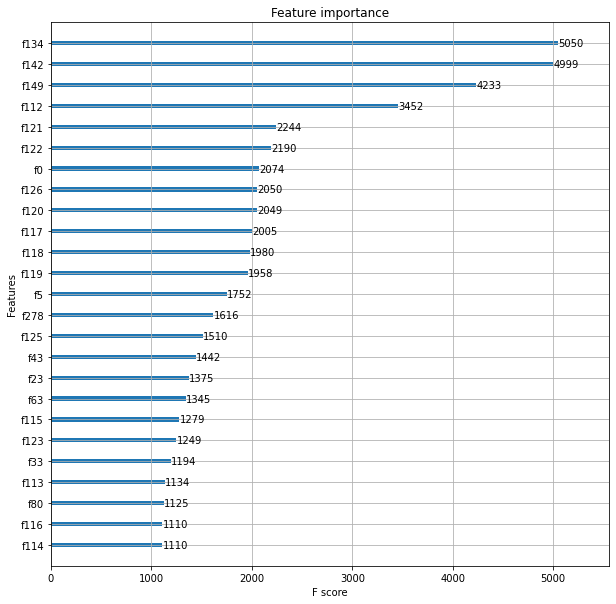

time: 798 ms


In [52]:
from matplotlib import pyplot as plt

fig, ax = plt.subplots(1,1,figsize=(10,10))
xgb.plot_importance(model, max_num_features=25, ax=ax)


In [53]:
actual_D_test = xgb.DMatrix(actualScaledX_test)
actual_pred = model.predict(actual_D_test)
best_preds = np.asarray([np.argmax(line) for line in actual_pred])
best_preds

array([2, 4, 2, ..., 3, 2, 2])

time: 864 ms


In [54]:
output_df = pd.DataFrame(best_preds, columns=['greatstone_rating'])
output_df.to_csv('/content/gdrive/My Drive/Hackathon/greatstone_mf_rating_xgb.csv') 

time: 91.9 ms
